In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
 

In [2]:
"""Se carga el MERCADO a analizar a través de YAHOO FINANCE, en este caso el MERVAL,
la data se obtiene de https://finance.yahoo.com/world-indices"""

data = yf.download('^MERV', auto_adjust = True) # auto_adjust, ajusta el OHLC (OPEN, HIGH, LOW, CLOSE del mercado), por defecto esta FALSE
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
1996-10-08,579.429993,592.650024,579.429993,590.109985,0
1996-10-09,590.109985,590.830017,582.210022,583.140015,0
1996-10-10,583.239990,584.609985,578.270020,584.609985,0
1996-10-11,584.909973,585.869995,582.440002,584.320007,0
1996-10-14,584.289978,584.289978,580.609985,584.030029,0
...,...,...,...,...,...
2021-09-21,73635.148438,74862.773438,73635.148438,73918.617188,0
2021-09-22,73918.617188,75369.359375,73918.617188,74750.226562,0
2021-09-23,74750.226562,75462.773438,74304.546875,74743.421875,0


In [3]:
nuevo = pd.Series([np.nan], index=(datetime(2021,9,13),)) # np.nan rellena de NaN, y con el index elegimos la fecha a completar con NaN
nuevo

2021-09-13   NaN
dtype: float64

In [4]:
"""Se redefine el dataset "data" agregandole la fila correspondiente a la fecha 2021-09-13 (nuevo, actualmente con todos los campos con NaN)
con axis = 0 indicamos que queremos unirlo como una ROW mas, ya que 0 refiere a fila."""
data = pd.concat([data,nuevo], axis=0)
data.drop(0, axis=1)#Eliminacion de la columna 0 "Date"

,Close,High,Low,Open,Volume
1996-10-08,590.109985,592.650024,579.429993,579.429993,0.0
1996-10-09,583.140015,590.830017,582.210022,590.109985,0.0
1996-10-10,584.609985,584.609985,578.270020,583.239990,0.0
1996-10-11,584.320007,585.869995,582.440002,584.909973,0.0
1996-10-14,584.030029,584.289978,580.609985,584.289978,0.0
...,...,...,...,...,...
2021-09-22,74750.226562,75369.359375,73918.617188,73918.617188,0.0
2021-09-23,74743.421875,75462.773438,74304.546875,74750.226562,0.0
2021-09-24,74180.203125,74922.726562,73918.562500,74743.421875,0.0
2021-09-27,75687.523438,75727.468750,74180.203125,74180.203125,0.0


In [5]:
data.Close.shift()

1996-10-08             NaN
1996-10-09      590.109985
1996-10-10      583.140015
1996-10-11      584.609985
1996-10-14      584.320007
                  ...     
2021-09-22    73918.617188
2021-09-23    74750.226562
2021-09-24    74743.421875
2021-09-27    74180.203125
2021-09-13    75687.523438
Name: Close, Length: 6112, dtype: float64

In [6]:
"""Con data.Close.shift() lo que se hace es rellenar el index 0 con NaN, y el valor  que alli de principio estaba
pasa al index siguiente por lo que el valor de 1996-10-08 que es 590.109985 pasa a ser el valor de la fecha 1996-10-09"""

data['Dia Post Eleccion'] = (data.Close / data.Close.shift()).add(-1).mul(100) # Se calcula la variación % de un día a otro en los cierres de vela
data['Dia Post Eleccion'] 

1996-10-08         NaN
1996-10-09   -1.181131
1996-10-10    0.252079
1996-10-11   -0.049602
1996-10-14   -0.049627
                ...   
2021-09-22    1.125034
2021-09-23   -0.009103
2021-09-24   -0.753536
2021-09-27    2.031971
2021-09-13         NaN
Name: Dia Post Eleccion, Length: 6112, dtype: float64

In [7]:
#Calculo de la variación % de una semana a otra de los cierres de vela
data['Semana Previa'] = (data.Close.shift() / data.Close.shift(6)).add(-1).mul(100)
data['Semana Previa']

1996-10-08         NaN
1996-10-09         NaN
1996-10-10         NaN
1996-10-11         NaN
1996-10-14         NaN
                ...   
2021-09-22   -6.419368
2021-09-23   -4.762830
2021-09-24   -6.263893
2021-09-27   -5.517482
2021-09-13    2.787222
Name: Semana Previa, Length: 6112, dtype: float64

In [12]:
"""Se crea un diccionario , donde se cargan fechas de elecciones Legislativas y Nacionales con sus respectivas fechas,
las que posteriormente relacionaremos con los % de variacion ocurridos con el fin de analizar el comportamiento generado"""

elecciones = {'Leg 1997' : '1997-10-26',
          'Nac 1999' : '1999-10-24',
          'Leg 2001' : '2001-10-14',
          'Nac 2003' : '2003-04-27',
          'Leg 2005' : '2005-10-23',
          'Nac 2007' : '2007-10-28',
          'Leg 2009' : '2009-06-28',
          'Paso 2011' : '2011-08-14',
          'Nac 2011' : '2011-10-23',
          'Paso 2013' : '2013-08-11',
          'Leg 2013' : '2013-10-27',
          'Paso 2015' : '2015-08-09',
          'Nac 2015' : '2015-10-25',
          'Paso 2017' : '2017-08-13',
          'Leg 2017' : '2017-10-22',
          'Paso 2019' : '2019-08-11',
          'Nac 2019' : '2019-10-26',
          'Paso 2021' : '2021-09-12' }

In [19]:
# Creamos una lista vacia que luego se llenara con los valores de Eleccon, Dia Post Eleccion, Semana Previa y color
lista = []

for eleccion, fecha in elecciones.items():
    dia_siguiente = datetime.strptime(fecha, '%Y-%m-%d')+timedelta(days=1)# datetime.strptime formateamos string a datetype y con timedelta le sumamos 1 dia para obtener dia siguiente
    datos = data.loc[data.index >= dia_siguiente].iloc[0]
# Creamos el diccionario r, creando las claves y values que van a formar parte de nuestra nueva tabla 
    r = {'Elección': eleccion, 
         'Dia Post Eleccion': datos['Dia Post Eleccion'],
         'Semana Previa' : datos['Semana Previa']}
    lista.append(r) # Agregamos el diccionario creado a la lista vacia creada al principio
    
df = pd.DataFrame(lista) #Creamos un dataframe en base a la lista anterior y lo definimos bajo una variable de nombre df
df['color'] = np.where(df['Dia Post Eleccion']>0, 'green', 'red')
df

,Elección,Dia Post Eleccion,Semana Previa,color
0,Leg 1997,-13.726618,-4.307443,red
1,Nac 1999,0.122748,7.542262,green
2,Leg 2001,-0.622396,12.681984,red
3,Nac 2003,-8.626508,10.880420,red
4,Leg 2005,1.886251,-0.660966,green
5,Nac 2007,0.428000,4.035987,green
6,Leg 2009,0.589248,1.316483,green
7,Paso 2011,0.560505,-3.280082,green
8,Nac 2011,2.298100,2.962035,green
9,Paso 2013,1.485984,4.519502,green


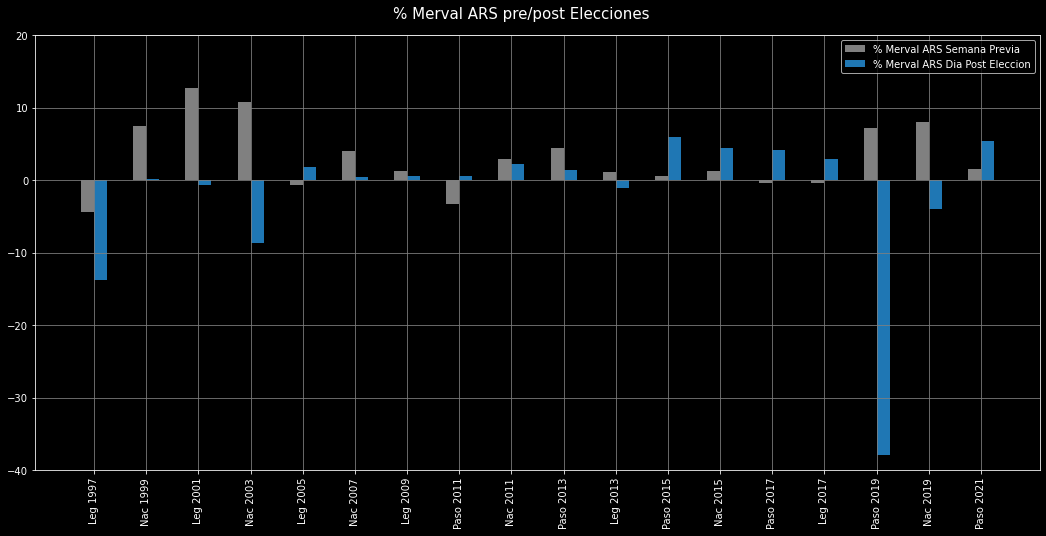

In [50]:
# Grafico
fig, ax = plt.subplots(figsize=(18,8)) # Se define el tamaño de los ejes y de la figura

plt.style.use('dark_background') # elegimos background negro 

ax.bar(df.index-0.125, df['Semana Previa'], width=0.25, color='gray', label='% Merval ARS Semana Previa')# Creamos la barra GRIS, determinamos ubicación, ancho y data a representar


ax.bar(df.index+0.125, df['Dia Post Eleccion'], width=0.25, color='tab:blue', label = '% Merval ARS Dia Post Eleccion')# Creamos la barra AZUL, determinamos ubicación, ancho y data a representar

ax.set_ylim(-40,20)#Determinamos tamaño del eje positivo como negativo de las Y, con el cual veremos la abrupta caida en paso 2019.

ax.legend() #Creamos leyenda para que se apliquen los label definidos arriba

plt.xticks(np.arange(0,len(df), 1.0))#Se define el eje de las x , desde donde empieza (0) hasta donde va (len(df)), y el tamaño del step (1).

ax.set_xticklabels(list(df['Elección'].values), rotation=90) # Ajustamos etiquetas del eje X a traves de una lista, de lo contrario solo mostraria un valor y le damos una rotacion de 90 grados

fig.suptitle('% Merval ARS pre/post Elecciones',fontsize=15, y=0.93) #Definicion del titulo superior , fontsize = tamaño de la letra , y = 0.93 ==> ubicación del titulo en el eje Y

ax.grid(color='grey') #Color de la cuadricula

plt.show() # Mostrar grafico